All of the code in this notebook has been tested in environments with and without GPU

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
cur_dir = os.getcwd()
father_dir = os.path.abspath(os.path.join(cur_dir, '..'))

## Generate fictitious reactions

In [3]:
from rxngraphormer.utils import gen_truth_false_rxn_smi

with open("./demo_data/demo_real_rxn_smi.txt","r") as fr:
    real_rxn_smi_lst = fr.readlines()
    real_rxn_smi_lst = [i.strip() for i in real_rxn_smi_lst]

real_fitc_rxn_smi = []
for real_rxn_smi in real_rxn_smi_lst:
    rct_smi,pdt_smi = real_rxn_smi.split(">>")
    real_fitc_rxn_smi.append(gen_truth_false_rxn_smi([rct_smi,pdt_smi,True]))

We don't seperate additives and solvents from reactants, and use `gen_truth_false_rxn_smi` to generate fake product to build fictitious reactions.

In [121]:
idx = 0

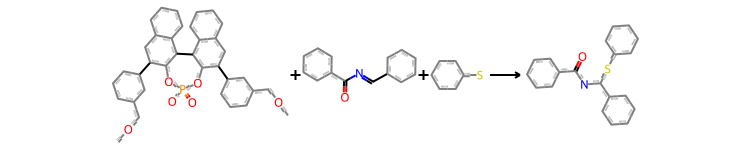

In [122]:
AllChem.ReactionFromSmarts(real_fitc_rxn_smi[idx][0][0])  ## real reaction

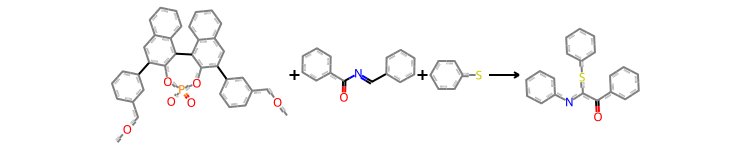

In [123]:
AllChem.ReactionFromSmarts(real_fitc_rxn_smi[idx][1][0]) ## ficitious reaction

## Generate delta-mol

In [4]:
from rxngraphormer.midgen.midmol import gen_mech_mid_smi
delta_mol_smi_lst = []
for real_rxn_smi in real_rxn_smi_lst:
    rct_pdt_pair = real_rxn_smi.split(">>")
    delta_mol_smi,_,_ = gen_mech_mid_smi(rct_pdt_pair)
    delta_mol_smi_lst.append(delta_mol_smi)

In [5]:
idx = 0

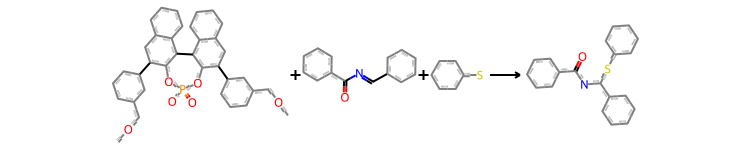

In [6]:
AllChem.ReactionFromSmarts(real_rxn_smi_lst[idx])   # original reaction

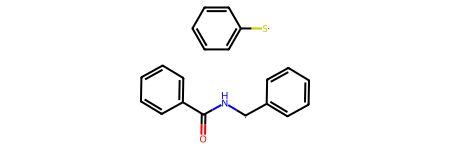

In [7]:
Chem.MolFromSmiles(delta_mol_smi_lst[idx])          # delta-mol graph

## Model evaluation

In [2]:
import glob
import numpy as np
from rxngraphormer.eval import eval_regression_performance
import warnings
warnings.filterwarnings("ignore")
all_results = {}

### Buchwald-Hartwig

Random split

In [11]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/buchwald_hartwig/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=100,yield_constrain=True)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"BH: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"BH: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["BH"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

Trial 0, R2: 0.9710909471898956, MAE: 2.978487968444824
Trial 1, R2: 0.971337815515432, MAE: 2.9998559951782227
Trial 2, R2: 0.9735100442000065, MAE: 2.974090576171875
Trial 3, R2: 0.972586278274578, MAE: 2.9170234203338623
Trial 4, R2: 0.9716989715813216, MAE: 3.0251381397247314
Trial 5, R2: 0.9686521124199009, MAE: 3.1029105186462402
Trial 6, R2: 0.9684075631628694, MAE: 3.111638069152832
Trial 7, R2: 0.9699690311310043, MAE: 3.074856758117676
Trial 8, R2: 0.9744858076854315, MAE: 3.023899555206299
Trial 9, R2: 0.9723437015334168, MAE: 3.0057895183563232
BH: 0.97141±0.00187
BH: 3.02137±0.05775


Out-of-sample test

In [3]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/buchwald_hartwig/*OOS")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=100,yield_constrain=True, specific_val=True)
    print(f"{path.split('/')[-1]}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)

all_results["BH_OOS"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

Cl_OOS, R2: -0.05326903026568952, MAE: 15.121686935424805
Br_OOS, R2: 0.8895973879469181, MAE: 5.806755065917969
I_OOS, R2: 0.823169589566018, MAE: 7.538482189178467


Processing...
100%|██████████| 898/898 [00:04<00:00, 190.49it/s]


[INFO] 898 Saving...


Done!
Processing...
100%|██████████| 898/898 [00:01<00:00, 885.09it/s]
Done!
Processing...
  8%|▊         | 73/898 [00:00<00:01, 722.10it/s]

[INFO] 898 Saving...


100%|██████████| 898/898 [00:01<00:00, 679.44it/s]
Done!


[INFO] 898 Saving...
Add_Test1_OOS, R2: 0.8829201548852081, MAE: 6.430312633514404


Processing...
100%|██████████| 900/900 [00:04<00:00, 198.39it/s]


[INFO] 900 Saving...


Done!
Processing...
100%|██████████| 900/900 [00:01<00:00, 807.41it/s]
Done!
Processing...
  0%|          | 0/900 [00:00<?, ?it/s]

[INFO] 900 Saving...


100%|██████████| 900/900 [00:01<00:00, 729.28it/s]
Done!


[INFO] 900 Saving...
Add_Test2_OOS, R2: 0.9056727210379172, MAE: 5.9999799728393555


Processing...
100%|██████████| 897/897 [00:04<00:00, 189.36it/s]


[INFO] 897 Saving...


Done!
Processing...
100%|██████████| 897/897 [00:01<00:00, 895.93it/s]
Done!
Processing...
  0%|          | 0/897 [00:00<?, ?it/s]

[INFO] 897 Saving...


100%|██████████| 897/897 [00:01<00:00, 706.19it/s]
Done!


[INFO] 897 Saving...
Add_Test3_OOS, R2: 0.7921284139198981, MAE: 8.498489379882812


Processing...
100%|██████████| 900/900 [00:04<00:00, 192.28it/s]


[INFO] 900 Saving...


Done!
Processing...
100%|██████████| 900/900 [00:01<00:00, 897.02it/s]
Done!
Processing...
  0%|          | 0/900 [00:00<?, ?it/s]

[INFO] 900 Saving...


100%|██████████| 900/900 [00:01<00:00, 725.75it/s]
Done!


[INFO] 900 Saving...
Add_Test4_OOS, R2: 0.7362689516591653, MAE: 9.936153411865234


Processing...
100%|██████████| 2935/2935 [00:14<00:00, 200.26it/s]


[INFO] 2935 Saving...


Done!
Processing...
100%|██████████| 2935/2935 [00:03<00:00, 827.86it/s]


[INFO] 2935 Saving...


Done!
Processing...
100%|██████████| 2935/2935 [00:03<00:00, 740.82it/s]
Done!


[INFO] 2935 Saving...
Component_Combination_Test_OOS, R2: 0.7253770471363625, MAE: 10.120718002319336


### Suzuki-Miyaura

Random split

In [12]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/suzuki_miyaura/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=100,yield_constrain=True)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"SM: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"SM: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["SM"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

Trial 0, R2: 0.8400846597377761, MAE: 7.3876495361328125
Trial 1, R2: 0.8573087128403252, MAE: 6.6109395027160645
Trial 2, R2: 0.8761586041606272, MAE: 6.2979912757873535
Trial 3, R2: 0.8720339327789756, MAE: 6.248346328735352
Trial 4, R2: 0.8715974081172003, MAE: 6.373606204986572
Trial 5, R2: 0.8852615192132637, MAE: 6.281859397888184
Trial 6, R2: 0.888240674263567, MAE: 6.1718621253967285
Trial 7, R2: 0.8881091465587136, MAE: 6.038573265075684
Trial 8, R2: 0.8711405118857802, MAE: 6.198689937591553
Trial 9, R2: 0.8822435171650416, MAE: 6.107220649719238
SM: 0.87322±0.01429
SM: 6.37167±0.36999


### Radical C-H functionalization

Random split

In [3]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/C_H_func/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=1,yield_constrain=False)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"CH: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"CH: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["CH"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

Trial 0, R2: 0.9927572106777472, MAE: 0.25295668840408325
Trial 1, R2: 0.9931484821962683, MAE: 0.26806801557540894
Trial 2, R2: 0.9915015889635864, MAE: 0.26732149720191956
Trial 3, R2: 0.9923498455525177, MAE: 0.2663370966911316
Trial 4, R2: 0.9929075147856894, MAE: 0.265802800655365
Trial 5, R2: 0.9921873899820716, MAE: 0.26857930421829224
Trial 6, R2: 0.9928988639525079, MAE: 0.2759893834590912
Trial 7, R2: 0.9907799829402785, MAE: 0.27508553862571716
Trial 8, R2: 0.9916349536260249, MAE: 0.2780734598636627
Trial 9, R2: 0.9925413220213724, MAE: 0.2785036563873291
CH: 0.99227±0.00071
CH: 0.26967±0.00730


### Thiol addition

random-split

In [13]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/thiol_addition/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=1,yield_constrain=False)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"TA: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"TA: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["TA"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

Trial 0, R2: 0.9096076560767163, MAE: 0.1410418003797531
Trial 1, R2: 0.9254825055634173, MAE: 0.1366979479789734
Trial 2, R2: 0.904589428453364, MAE: 0.13625450432300568
Trial 3, R2: 0.9149569966057206, MAE: 0.13379794359207153
Trial 4, R2: 0.914440363315254, MAE: 0.13580460846424103
Trial 5, R2: 0.907811356214753, MAE: 0.14370281994342804
Trial 6, R2: 0.9234534869804154, MAE: 0.12996156513690948
Trial 7, R2: 0.9177492169865181, MAE: 0.140384241938591
Trial 8, R2: 0.9170189844940059, MAE: 0.1370164155960083
Trial 9, R2: 0.9251684835881784, MAE: 0.12802831828594208
TA: 0.91603±0.00689
TA: 0.13627±0.00458


Out-of-sample test

In [6]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/thiol_addition/*OOS")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=1,yield_constrain=False,specific_val=True)
    print(f"{path.split('/')[-1]}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
all_results["TA_OOS"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

Processing...
100%|██████████| 304/304 [00:01<00:00, 216.91it/s]
Done!
Processing...
  0%|          | 0/304 [00:00<?, ?it/s]

[INFO] 304 Saving...


100%|██████████| 304/304 [00:00<00:00, 623.44it/s]
Done!
Processing...
  0%|          | 0/304 [00:00<?, ?it/s]

[INFO] 304 Saving...


100%|██████████| 304/304 [00:00<00:00, 577.43it/s]
Done!


[INFO] 304 Saving...
Cat_Test_OOS, R2: 0.7809359744925044, MAE: 0.23593008518218994


Processing...
100%|██████████| 216/216 [00:01<00:00, 187.18it/s]
Done!
Processing...
  0%|          | 0/216 [00:00<?, ?it/s]

[INFO] 216 Saving...


100%|██████████| 216/216 [00:00<00:00, 621.07it/s]
Done!
Processing...
 27%|██▋       | 58/216 [00:00<00:00, 570.35it/s]

[INFO] 216 Saving...


100%|██████████| 216/216 [00:00<00:00, 547.33it/s]
Done!


[INFO] 216 Saving...
Sub_Test_OOS, R2: 0.9230315553766272, MAE: 0.13826876878738403


Processing...
100%|██████████| 171/171 [00:00<00:00, 198.54it/s]
Done!
Processing...
  0%|          | 0/171 [00:00<?, ?it/s]

[INFO] 171 Saving...


100%|██████████| 171/171 [00:00<00:00, 593.90it/s]
Done!
Processing...
 34%|███▍      | 58/171 [00:00<00:00, 570.74it/s]

[INFO] 171 Saving...


100%|██████████| 171/171 [00:00<00:00, 548.08it/s]
Done!


[INFO] 171 Saving...
SubCat_Test_OOS, R2: 0.803925707111992, MAE: 0.2476276159286499


### External validation dataset

In [33]:
from sklearn.metrics import r2_score,accuracy_score, precision_score, mean_absolute_error, confusion_matrix

NiCOLit

In [24]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/external_validation/external_dataset_1/DOI*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=100,yield_constrain=True,specific_val=True)
    #print(f"{path.split('/')[-1]}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)

all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)
r2 = r2_score(all_targets,all_preds)
mae = mean_absolute_error(all_targets,all_preds)
all_targets_class, all_preds_class = np.where(all_targets.reshape(-1)>50,1,0),np.where(all_preds.reshape(-1)>50,1,0)
all_results["External_NiCOLit"] = [all_r2,all_mae,all_preds,all_targets,all_targets_class,all_preds_class]
precision = precision_score(all_targets_class, all_preds_class)
accuracy = accuracy_score(all_targets_class, all_preds_class)
print(f"NiCOLit: R2: {r2}, MAE: {mae}")
print(f"NiCOLit: Precision: {precision}, Accuracy: {accuracy}")
os.chdir(cur_dir)

NiCOLit: R2: 0.3088621188150038, MAE: 21.761363983154297
NiCOLit: Precision: 0.7931034482758621, Accuracy: 0.7318634423897582


AHO

In [37]:
os.chdir(father_dir)
path = "./model_path/external_validation/external_dataset_2"
r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=1,yield_constrain=False,specific_val=True)
print(f"AHO: R2: {r2}, MAE: {mae}")
all_results["External_AHO"] = [r2,mae,preds,targets]
os.chdir(cur_dir)

AHO: R2: 0.8321854446615339, MAE: 0.3709467649459839


pallada-electrocatalyzed C–H activation

In [38]:
os.chdir(father_dir)
path = "./model_path/external_validation/external_dataset_3"
r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=1,yield_constrain=False,specific_val=True)
print(f"pallada-electrocatalyzed C–H activation: R2: {r2}, MAE: {mae}")
all_results["External_C–H_activation"] = [r2,mae,preds,targets]
os.chdir(cur_dir)

pallada-electrocatalyzed C–H activation: R2: 0.9240376801007262, MAE: 0.2106555998325348


### Visulization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

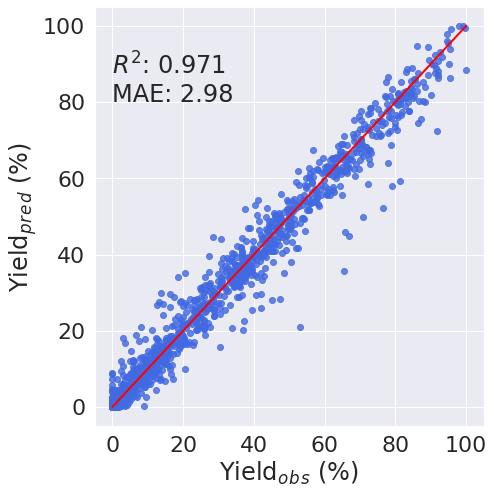

In [15]:
all_r2,all_mae,all_preds,all_targets = all_results["BH"]
idx = 0  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,100],[0,100],color="red",linestyle="-",linewidth=2)
plt.xticks(list(range(0,120,20)))
plt.yticks(list(range(0,120,20)))
plt.text(0,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.2f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
plt.savefig("./BH_regression.png",dpi=400)
print()

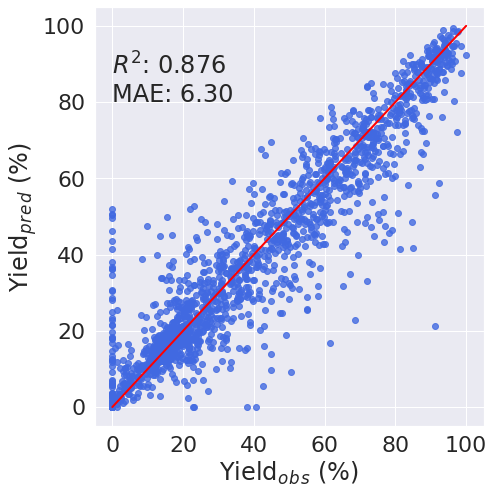

In [16]:
all_r2,all_mae,all_preds,all_targets = all_results["SM"]
idx = 2  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,100],[0,100],color="red",linestyle="-",linewidth=2)
plt.xticks(list(range(0,120,20)))
plt.yticks(list(range(0,120,20)))
plt.text(0,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.2f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
plt.savefig("./SM_regression.png",dpi=400)
print()

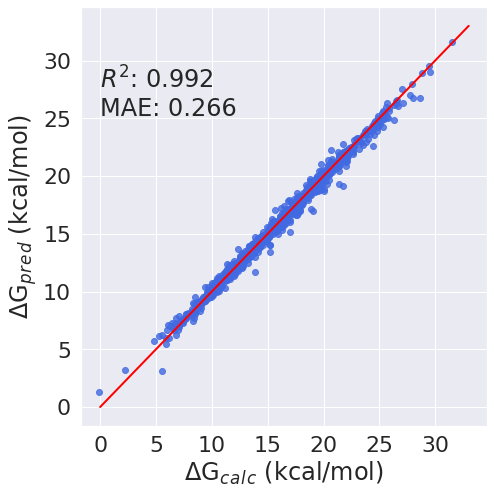

In [18]:
all_r2,all_mae,all_preds,all_targets = all_results["CH"]
idx = 3  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,33],[0,33],color="red",linestyle="-",linewidth=2)
plt.xticks(list(range(0,35,5)))
plt.yticks(list(range(0,35,5)))
plt.text(0,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$G$_c$$_a$$_l$$_c$ (kcal/mol)")
plt.ylabel("$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./Radical_C-H_func_regression.png",dpi=400)
print()

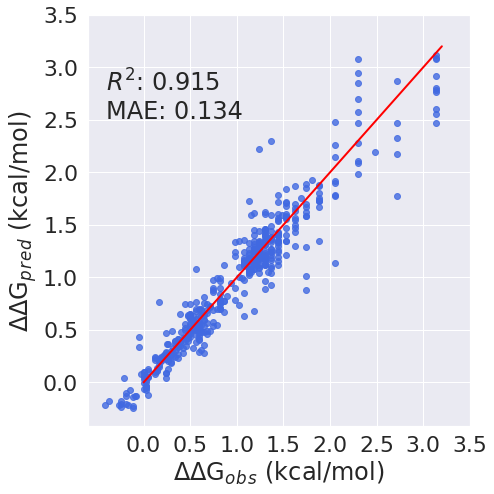

In [22]:
all_r2,all_mae,all_preds,all_targets = all_results["TA"]
idx = 3  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,3.2],[0,3.2],color="red",linestyle="-",linewidth=2)
plt.xticks(list(np.arange(0,4.0,0.5)))
plt.yticks(list(np.arange(0,4.0,0.5)))
plt.text(-0.4,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./TA_regression.png",dpi=400)
print()

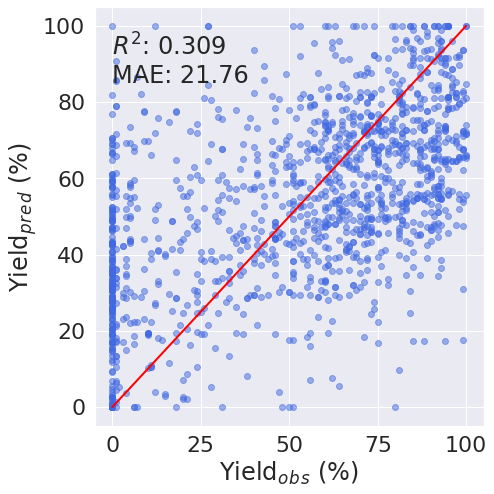

In [35]:
all_r2,all_mae,all_preds,all_targets,all_targets_class,all_preds_class = all_results["External_NiCOLit"]
r2 = r2_score(all_targets,all_preds)
mae = mean_absolute_error(all_targets,all_preds)
sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=all_targets.reshape(-1),y=all_preds.reshape(-1),color="royalblue",alpha=0.5)
plt.plot([0,100],[0,100],color="red",linestyle="-",linewidth=2)
plt.text(0,all_targets.reshape(-1).max()*0.85,f"$R^2$: {r2:.3f}\nMAE: {mae:.2f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
plt.savefig("./NiCOLit_Regression.png",dpi=400)
print()

precision 0.7931034482758621
accuracy 0.7318634423897582


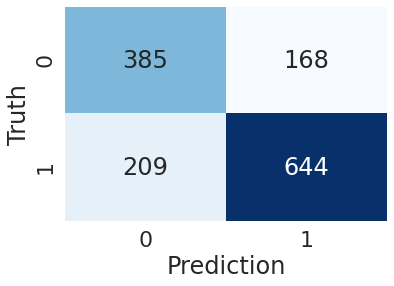

In [46]:
sns.set_theme(style="white",font_scale=2)

conf_mat = confusion_matrix(all_targets_class,all_preds_class)
precision = precision_score(all_targets_class,all_preds_class)
accuracy = accuracy_score(all_targets_class,all_preds_class)
plt.figure(figsize=(6,4.5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",cbar=False)
#plt.colorbar()
plt.xlabel("Prediction")
plt.ylabel("Truth")
#plt.title(f"Precision: {precision:.3f}")
plt.tight_layout()
plt.savefig("./NiCOLit_Classification.png",dpi=400)
print("precision",precision)
print("accuracy",accuracy)

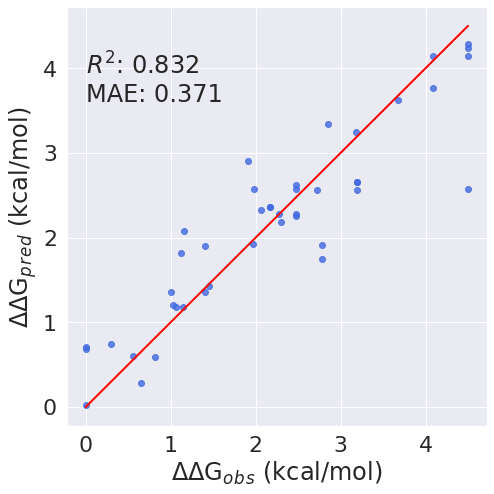

In [40]:
r2,mae,preds,targets = all_results["External_AHO"]
sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,4.5],[0,4.5],color="red",linestyle="-",linewidth=2)
plt.xticks([0,1.0,2.0,3.0,4.0])
plt.yticks([0,1.0,2.0,3.0,4.0])
plt.text(0,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./AHO_Regression.png",dpi=400)
print()

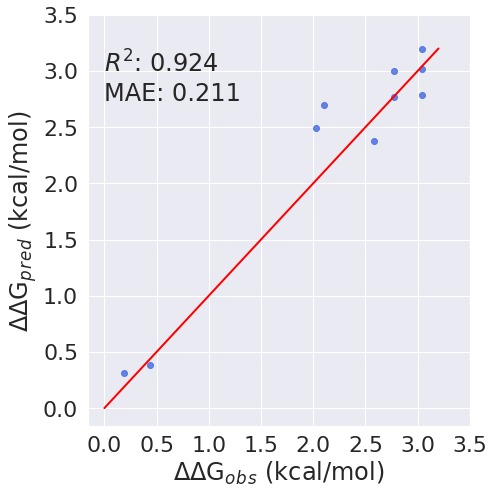

In [42]:
r2,mae,preds,targets = all_results["External_C–H_activation"]
sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,3.2],[0,3.2],color="red",linestyle="-",linewidth=2)
plt.xticks(list(np.arange(0,4.0,0.5)))
plt.yticks(list(np.arange(0,4.0,0.5)))
plt.text(0,targets.cpu().view(-1).max()*0.9,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./C–H_activation_Regression.png",dpi=400)
print()

## Generate reaction embeddings

In [27]:
from rxngraphormer.rxn_emb import RXNEMB
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

### Using pre-trained model

Measure the distance between different reaction types in USPTO-50k

In [17]:
rxnemb_calc = RXNEMB(pretrained_model_path="../model_path/pretrained_classification_model")
rxn_emb = rxnemb_calc.gen_rxn_emb_from_dataset(root="../dataset/50k_with_rxn_type",
                                               rct_name_regrex="50k_rxn_type_rct_0.csv",
                                               pdt_name_regrex="50k_rxn_type_pdt_0.csv",
                                               batch_size=128)

[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ../dataset/50k_with_rxn_type/50k_rxn_type_rct_0.csv is processing...


Processing...
100%|██████████| 50000/50000 [03:10<00:00, 262.80it/s]


[INFO] 50000 data index 0 is saving...


Done!
Processing...
  0%|          | 0/50000 [00:00<?, ?it/s]

[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ../dataset/50k_with_rxn_type/50k_rxn_type_pdt_0.csv is processing...


100%|██████████| 50000/50000 [01:53<00:00, 441.01it/s]


[INFO] 50000 data index 0 is saving...


Done!
  0%|          | 0/391 [00:00<?, ?it/s]

[INFO] Generating reaction embedding...


100%|██████████| 391/391 [03:02<00:00,  2.14it/s]


In [18]:
dataset_50k_file = "../dataset/50k_with_rxn_type/schneider50k.tsv"
dataset_50k_df = pd.read_csv(dataset_50k_file,sep='\t')
rxn_lst = dataset_50k_df["rxn"].tolist()
rxn_class_lst = dataset_50k_df["rxn_class"].tolist()
rxn_class_set = list(set(rxn_class_lst))
rxn_class_set = sorted(rxn_class_set,key=lambda x: (int(x.split(".")[0]),int(x.split(".")[1]),int(x.split(".")[2])))  # sort by rxn_class
rxn_class_ct_map = sorted([[rxn_class,rxn_class_lst.count(rxn_class)] for rxn_class in rxn_class_set],key=lambda x:x[1])
rxn_class_idx_map = {}
for idx in range(len(rxn_class_lst)):
    rxn_class = rxn_class_lst[idx]
    if rxn_class not in rxn_class_idx_map:
        rxn_class_idx_map[rxn_class] = []
    rxn_class_idx_map[rxn_class].append(idx)

# calculate distance matrix
rxn_class_dist_mat = np.zeros(shape=(len(rxn_class_set),len(rxn_class_set)))
tot_comb = len(rxn_class_set) ** 2
for rxn_class_id_0 in range(len(rxn_class_set)):
    for rxn_class_id_1 in range(len(rxn_class_set)):
        rxn_class_0 = rxn_class_set[rxn_class_id_0]
        rxn_class_1 = rxn_class_set[rxn_class_id_1]
        dist = pairwise_distances(rxn_emb[rxn_class_idx_map[rxn_class_0]],rxn_emb[rxn_class_idx_map[rxn_class_1]],metric="euclidean").mean()
        rxn_class_dist_mat[rxn_class_id_0,rxn_class_id_1] = dist

<AxesSubplot:>

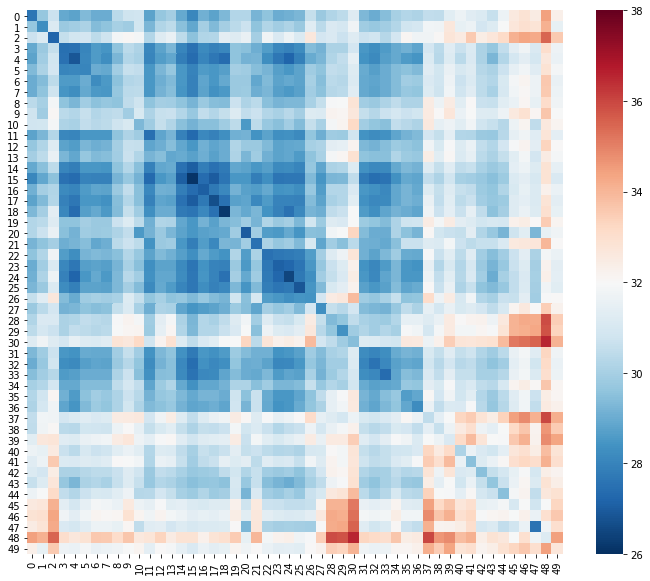

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(rxn_class_dist_mat,cmap="RdBu_r",annot=False,vmin=26,vmax=38)

### t-SNE analysis

In [28]:
import json
from sklearn.manifold import TSNE
from rxngraphormer.data import get_idx_split

Suzuki-Miyaura (random-split test set)

In [21]:
rct_data_file = "../dataset/SM_rct_tot.csv"
pdt_data_file = "../dataset/SM_pdt_tot.csv"
pt_model_path = "../model_path/pretrained_classification_model"
ft_model_path = "../model_path/suzuki_miyaura/seed1"
with open(rct_data_file,"r") as fr:
    rct_dataset = [line.strip().split(",")[0] for line in fr.readlines()]
with open(rct_data_file,"r") as fr:
    target = np.array([float(line.strip().split(",")[1]) for line in fr.readlines()],dtype=np.float32)
with open(pdt_data_file,"r") as fr:
    pdt_dataset = [line.strip().split(",")[0] for line in fr.readlines()]

# get test set
with open(f"{ft_model_path}/parameters.json","r") as fr:
    config_dict = json.load(fr)
split_ids_map = get_idx_split(len(rct_dataset), 
                        int(config_dict["data"]["train_ratio"]*len(rct_dataset)), 
                        int(config_dict["data"]["valid_ratio"]*len(rct_dataset)), 
                        config_dict["data"]["seed"])
test_data_idx = split_ids_map["test"].tolist()
test_rct_dataset = [rct_dataset[i] for i in test_data_idx]
test_pdt_dataset = [pdt_dataset[i] for i in test_data_idx]
test_target = target[test_data_idx]

# generate reaction embeddings
rxnemb_calc_pretrained = RXNEMB(pretrained_model_path=pt_model_path)
rxnemb_calc_downstream = RXNEMB(pretrained_model_path=ft_model_path,model_type="regressor")

pt_rxn_emb = rxnemb_calc_pretrained.gen_rxn_emb([f"{rct}>>{pdt}" for rct,pdt in zip(test_rct_dataset,test_pdt_dataset)],batch_size=128)
ds_rxn_emb = rxnemb_calc_downstream.gen_rxn_emb([f"{rct}>>{pdt}" for rct,pdt in zip(test_rct_dataset,test_pdt_dataset)],batch_size=128)

Processing...
  0%|          | 0/1729 [00:00<?, ?it/s]

[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/rct_smiles_0.csv is processing...


100%|██████████| 1729/1729 [00:09<00:00, 182.66it/s]


[INFO] 1729 data index 0 is saving...


Done!
Processing...
  3%|▎         | 56/1729 [00:00<00:03, 556.10it/s]

[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/pdt_smiles_0.csv is processing...


100%|██████████| 1729/1729 [00:03<00:00, 529.77it/s]
Done!
  0%|          | 0/14 [00:00<?, ?it/s]

[INFO] 1729 data index 0 is saving...
[INFO] Generating reaction embedding...


100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
Processing...
  0%|          | 0/1729 [00:00<?, ?it/s]

[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/rct_smiles_0.csv is processing...


100%|██████████| 1729/1729 [00:09<00:00, 178.78it/s]


[INFO] 1729 data index 0 is saving...


Done!
Processing...
  3%|▎         | 53/1729 [00:00<00:03, 524.03it/s]

[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/pdt_smiles_0.csv is processing...


100%|██████████| 1729/1729 [00:03<00:00, 543.99it/s]
Done!
  0%|          | 0/14 [00:00<?, ?it/s]

[INFO] 1729 data index 0 is saving...
[INFO] Generating reaction embedding...


100%|██████████| 14/14 [00:07<00:00,  1.99it/s]


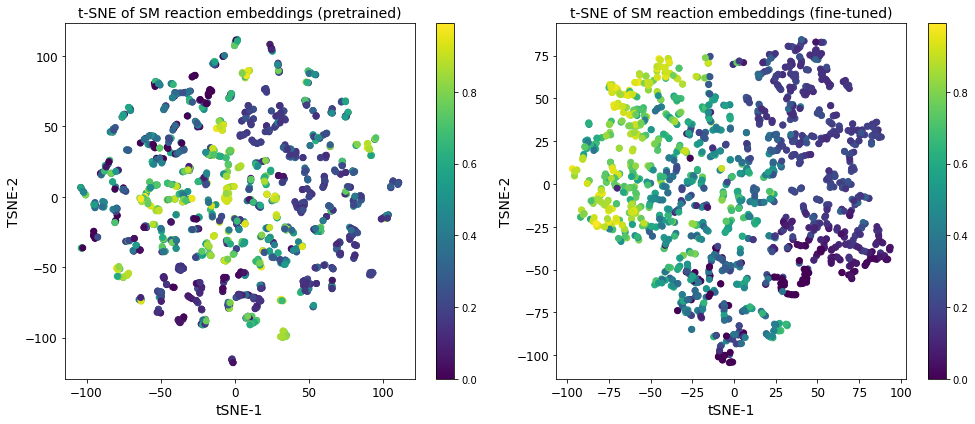

In [22]:
tick_font_size = 12
label_font_size = 14
perplexity = 5

tsne = TSNE(n_components=2,perplexity=perplexity,learning_rate=200,init="pca",random_state=42)
pt_rxn_emb_2d = tsne.fit_transform(pt_rxn_emb)
ds_rxn_emb_2d = tsne.fit_transform(ds_rxn_emb)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.scatter(pt_rxn_emb_2d[:,0],pt_rxn_emb_2d[:,1],c=test_target)
plt.xlabel("tSNE-1",fontsize=label_font_size)
plt.ylabel("TSNE-2",fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.title(f"t-SNE of SM reaction embeddings (pretrained)",fontsize=label_font_size)
plt.colorbar()

plt.subplot(122)
plt.scatter(ds_rxn_emb_2d[:,0],ds_rxn_emb_2d[:,1],c=test_target)
plt.xlabel("tSNE-1",fontsize=label_font_size)
plt.ylabel("TSNE-2",fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.title(f"t-SNE of SM reaction embeddings (fine-tuned)",fontsize=label_font_size)
plt.colorbar()
plt.tight_layout()

thiol addition sub-cat test

In [29]:
from rdkit.Chem import Draw

In [34]:
rct_data_file = "../dataset/OOS/thiol_addition_sub_cat_test_rct.csv"
pdt_data_file = "../dataset/OOS/thiol_addition_sub_cat_test_pdt.csv"
ft_model_path = "../model_path/thiol_addition/SubCat_Test_OOS"
with open(rct_data_file,"r") as fr:
    rct_dataset = [line.strip().split(",")[0] for line in fr.readlines()]
with open(rct_data_file,"r") as fr:
    target = np.array([float(line.strip().split(",")[1]) for line in fr.readlines()],dtype=np.float32)
with open(pdt_data_file,"r") as fr:
    pdt_dataset = [line.strip().split(",")[0] for line in fr.readlines()]

# generate reaction embeddings
rxnemb_calc_downstream = RXNEMB(pretrained_model_path=ft_model_path,model_type="regressor")
ds_rxn_emb = rxnemb_calc_downstream.gen_rxn_emb([f"{rct}>>{pdt}" for rct,pdt in zip(rct_dataset,pdt_dataset)],batch_size=128)

/home/echo/miniconda3/envs/rxng/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)
Processing...
  0%|          | 0/171 [00:00<?, ?it/s]/home/echo/miniconda3/envs/rxng/lib/python3.8/site-packages/rxngraphormer/data.py:460: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mol_index=mol_index,y=tgt_,ext_feat=torch.tensor(ext_feat_desc).float())
 12%|█▏        | 21/171 [00:00<00:00, 206.75it/s]

[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/rct_smiles_0.csv is processing...


100%|██████████| 171/171 [00:00<00:00, 208.67it/s]
Done!
Processing...
 35%|███▍      | 59/171 [00:00<00:00, 582.68it/s]

[INFO] 171 data index 0 is saving...
[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/pdt_smiles_0.csv is processing...


100%|██████████| 171/171 [00:00<00:00, 572.55it/s]
Done!
  0%|          | 0/2 [00:00<?, ?it/s]/home/echo/miniconda3/envs/rxng/lib/python3.8/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


[INFO] 171 data index 0 is saving...
[INFO] Generating reaction embedding...


100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


In [35]:
tick_font_size = 12
label_font_size = 14
perplexity = 5

colors = [
    'dimgray',  
    'indianred',  
    'gold',  
    'yellowgreen',  
    'seagreen',  
    'royalblue',  
    'blueviolet', 
]
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 
            'h', 'H', 'D', 'd', 'P', 'X', '.', ',', '1', '2']
tsne = TSNE(n_components=2,perplexity=perplexity,learning_rate=200,init="pca",random_state=42)
ds_rxn_emb_2d = tsne.fit_transform(ds_rxn_emb)

In [36]:
# get label of catalyst and product
phos_smi_lst = []
for rct_smi in rct_dataset:
    rct_smi_blks = rct_smi.split(".")
    for blk in rct_smi_blks:
        if "P" in blk or "p" in blk:
            phos_smi_lst.append(blk)
            break
phos_smi_set = list(set(phos_smi_lst))
phos_smi_id_map = {smi:i for i,smi in enumerate(phos_smi_set)}
phos_id_smi_map = {i:smi for i,smi in enumerate(phos_smi_set)}
phos_id_arr = np.array([phos_smi_id_map[smi] for smi in phos_smi_lst])

pdt_smi_lst = pdt_dataset
pdt_smi_set = list(set(pdt_smi_lst))
pdt_smi_id_map = {smi:i for i,smi in enumerate(pdt_smi_set)}
pdt_id_arr = np.array([pdt_smi_id_map[smi] for smi in pdt_smi_lst])

Although the t-SNE algorithm exhibits inherent stochasticity (resulting in variations in point distributions across different runs), the fundamental structure-performance relationship between reaction enantioselectivity and catalysts established in our study remains statistically robust.

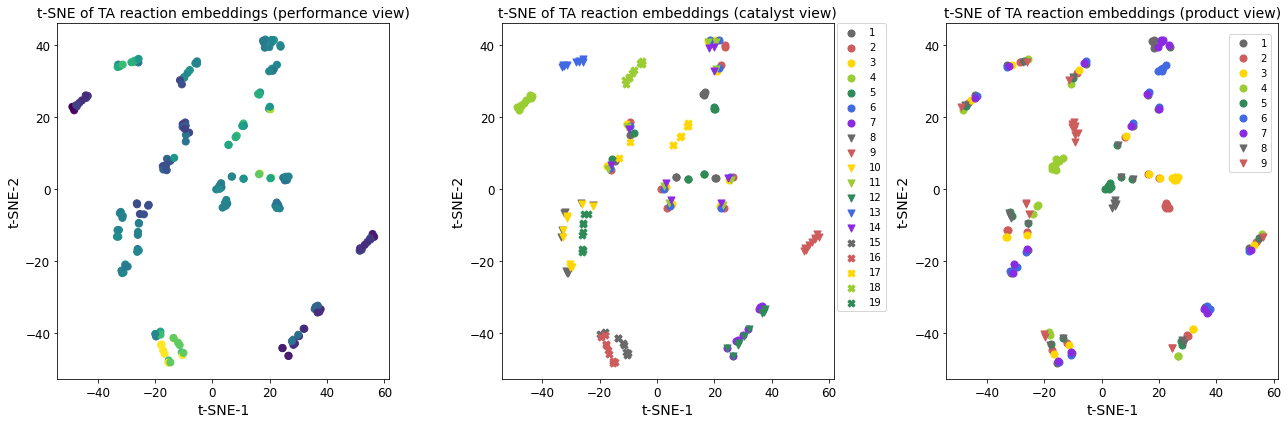

In [37]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.scatter(ds_rxn_emb_2d[:,0],ds_rxn_emb_2d[:,1],c=target,s=50)
plt.xlabel("t-SNE-1",fontsize=label_font_size)
plt.ylabel("t-SNE-2",fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.title(f"t-SNE of TA reaction embeddings (performance view)",fontsize=label_font_size)
#plt.colorbar()

plt.subplot(132)
for id in list(phos_smi_id_map.values()):
    index = np.where(phos_id_arr==id)[0]
    if id < 7:
        plt.scatter(ds_rxn_emb_2d[index,0],ds_rxn_emb_2d[index,1],c=colors[id],s=50,label=id+1,marker="o")
    elif id < 14:
        new_id = id - 7
        plt.scatter(ds_rxn_emb_2d[index,0],ds_rxn_emb_2d[index,1],c=colors[new_id],s=50,label=id+1,marker="v")
    else:
        new_id = id - 14
        plt.scatter(ds_rxn_emb_2d[index,0],ds_rxn_emb_2d[index,1],c=colors[new_id],s=50,label=id+1, linewidths=1,marker="X")
plt.xlabel("t-SNE-1",fontsize=label_font_size)
plt.ylabel("t-SNE-2",fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title(f"t-SNE of TA reaction embeddings (catalyst view)",fontsize=label_font_size)

plt.subplot(133)
for id in list(pdt_smi_id_map.values()):
    index = np.where(pdt_id_arr==id)[0]
    if id < 7:
        plt.scatter(ds_rxn_emb_2d[index,0],ds_rxn_emb_2d[index,1],c=colors[id],s=50,label=id+1,marker="o")
    elif id < 14:
        new_id = id - 7
        plt.scatter(ds_rxn_emb_2d[index,0],ds_rxn_emb_2d[index,1],c=colors[new_id],s=50,label=id+1,marker="v")
    else:
        new_id = id - 14
        plt.scatter(ds_rxn_emb_2d[index,0],ds_rxn_emb_2d[index,1],c=colors[new_id],s=50,label=id+1, linewidths=1,marker="X")
plt.xlabel("t-SNE-1",fontsize=label_font_size)
plt.ylabel("t-SNE-2",fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.legend(bbox_to_anchor=(0.85, 0.97), loc=2, borderaxespad=0.)
plt.title(f"t-SNE of TA reaction embeddings (product view)",fontsize=label_font_size)

plt.tight_layout()

There are some randomness in catalysts/products sorting, due to conversion from list to set and back to list, so the index of catalysts/products may not be the same as the index in the paper, but the conclusion remains the same.

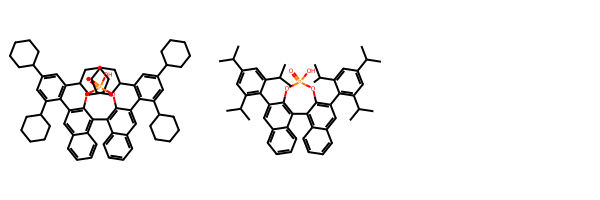

In [23]:
# high selectivity catalysts
Draw.MolsToGridImage([Chem.MolFromSmiles(phos_id_smi_map[16-1]),Chem.MolFromSmiles(phos_id_smi_map[15-1])])

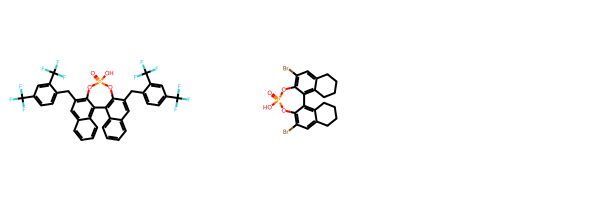

In [25]:
# low selectivity catalysts
Draw.MolsToGridImage([Chem.MolFromSmiles(phos_id_smi_map[4-1]),Chem.MolFromSmiles(phos_id_smi_map[9-1])])